Вибрати з інтернету два зображення з різною деталізацією об’єктів та два зображення
з різним контрастом.

Виконати детекцію границь на зображеннях за допомогою операторів Roberts,
Sobel. Провести порівняльний аналіз

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
low_det = cv2.imread("low_det.jpg")
high_det = cv2.imread("high_det.jpg")
low_con = cv2.imread("low_con.jpg")
high_con = cv2.imread("high_con.jpg")

In [ ]:
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

In [ ]:
roberts_kernel = np.array([[1, 0], [0, -1]])

In [ ]:
gaussian_kernel = (1/273) * np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]])

In [ ]:
def rgb2gray(image_vals):
  r, g, b = image_vals[:,:,0], image_vals[:,:,1], image_vals[:,:,2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

In [ ]:
def gaussian_blur(image):
  return convoultion(image, gaussian_kernel)

In [ ]:
def convoultion(image, kernel):
  if len(image.shape) == 3:
    image = rgb2gray(image)
  
  image_row, image_col = image.shape
  kernel_row, kernel_col = kernel.shape

  output = np.zeros(image.shape)

  pad_height = int((kernel_row - 1) / 2)
  pad_width = int((kernel_col - 1) / 2)

  padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

  padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

  for row in range(image_row):
    for col in range(image_col):
      output[row, col] = np.sum(kernel*padded_image[row:row + kernel_row, col:col+kernel_col])
  
  return output

In [ ]:
def filtering(image, kernel):
  #image = gaussian_blur(image)
  gradient_x = convoultion(image, kernel)
  gradient_y = convoultion(image, np.flip(kernel.T, axis=0))
  gradient = abs(gradient_x) + abs(gradient_y)
  gradient *= 255.0 / gradient.max()
  return gradient

In [ ]:
def thresholding(image, level):
  th_img = image.copy()
  th_img[th_img>=level] = 255
  th_img[th_img<level] = 0
  return th_img

In [ ]:
def plot_img(input_image, sobel_image, roberts_image):
  if len(input_image.shape) == 3:
    input_image = rgb2gray(input_image)
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 20))
  ax[0].imshow(input_image, cmap='gray')
  ax[0].set_title('Input Image')
  ax[0].axis('off')
  ax[1].imshow(sobel_image, cmap='gray')
  ax[1].set_title('Sobel Edge Detection')
  ax[1].axis('off')
  ax[2].imshow(roberts_image, cmap='gray')
  ax[2].set_title('Roberts Edge Detection')
  ax[2].axis('off')
  plt.show()

In [ ]:
def show_image(image):
  plt.figure(figsize=(12.5, 10))
  plt.imshow(image, cmap='gray')
  plt.title("Image")
  plt.show()

In [ ]:
sobel_low_det = filtering(low_det, sobel_kernel)

In [ ]:
roberts_low_det = filtering(low_det, roberts_kernel)

In [ ]:
sobel_high_det = filtering(high_det, sobel_kernel)

In [ ]:
roberts_high_det = filtering(high_det, roberts_kernel)

In [ ]:
sobel_low_con = filtering(low_con, sobel_kernel)

In [ ]:
roberts_low_con = filtering(low_con, roberts_kernel)

In [ ]:
sobel_high_con = filtering(high_con, sobel_kernel)

In [ ]:
roberts_high_con = filtering(high_con, roberts_kernel)

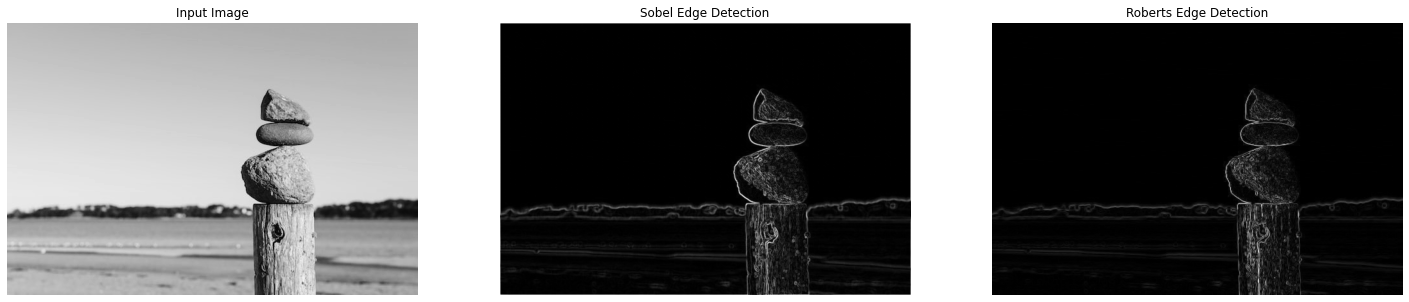

In [ ]:
plot_img(low_det, sobel_low_det, roberts_low_det)

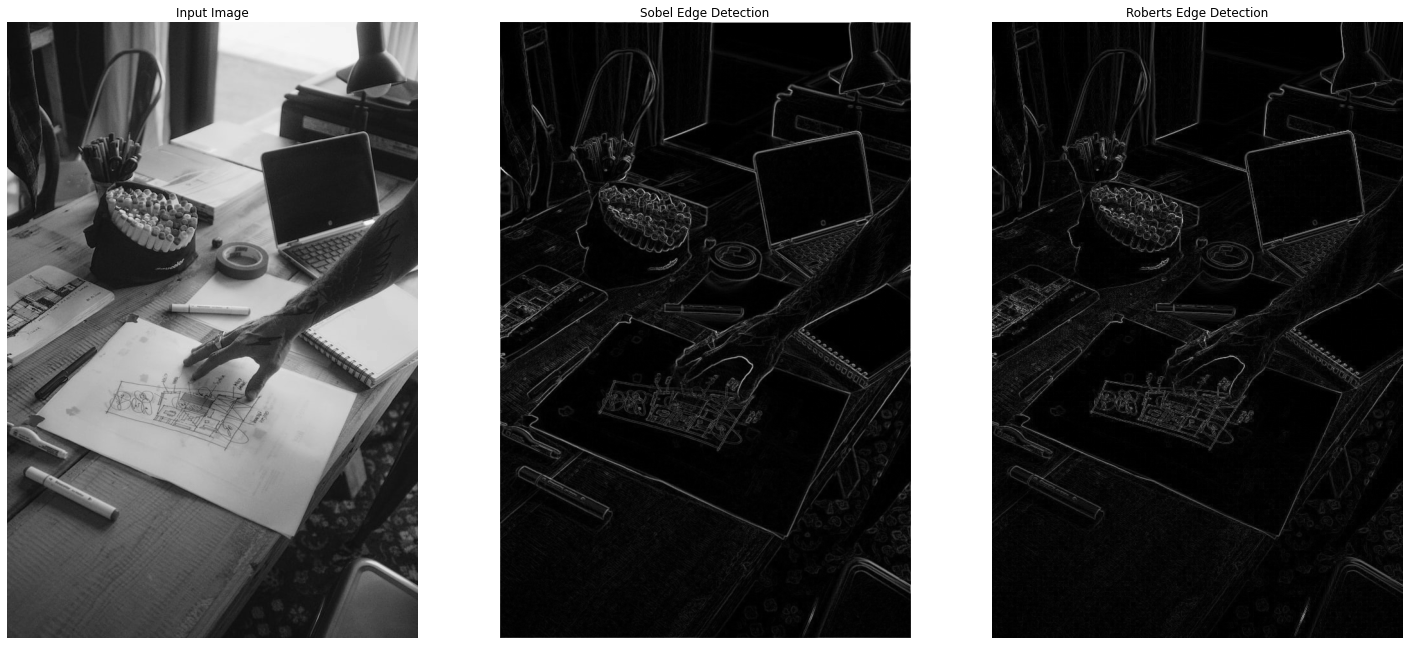

In [ ]:
plot_img(high_det, sobel_high_det, roberts_high_det)

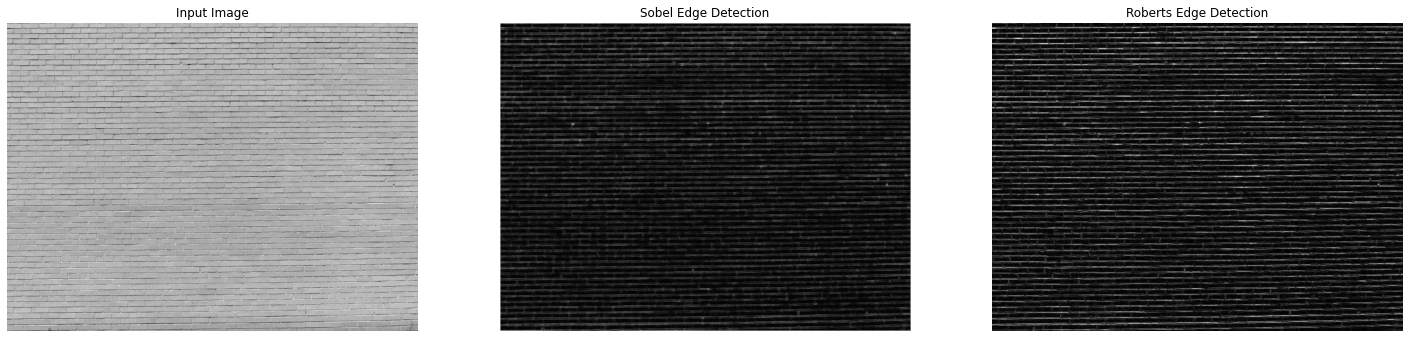

In [ ]:
plot_img(low_con, sobel_low_con, roberts_low_con)

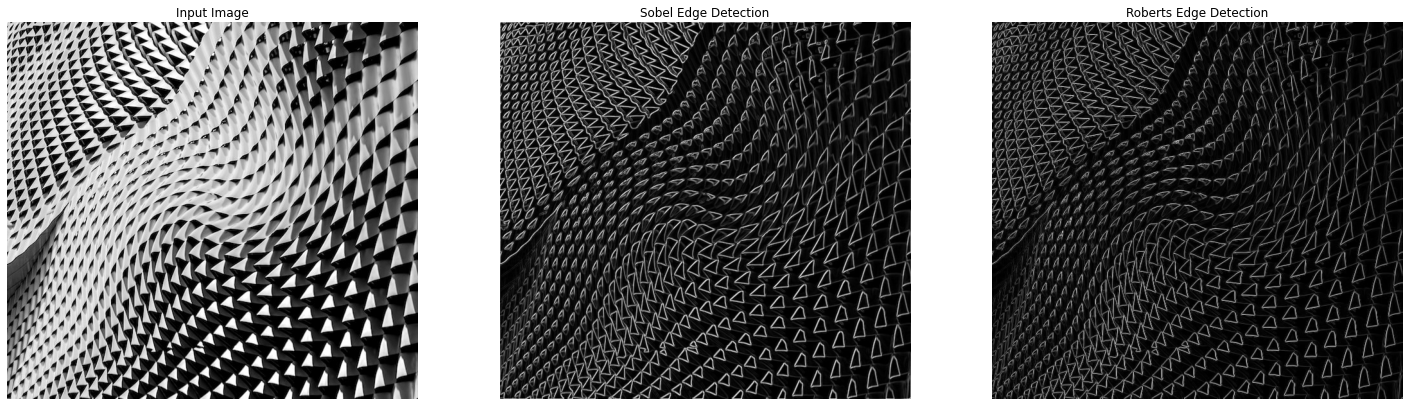

In [ ]:
plot_img(high_con, sobel_high_con, roberts_high_con)

Основною відміннісю між операторами детекції границь Roberts та Sobel є ядро. В оператора Sobel більше ядро краще згладжує вхідне зображення, а отже, робить оператор менш чутливим до шуму. Але більше ядро вимагає більших обчислень порівняно з оператором Roberts, що збільшує час виконання. Також можна побачити, що лінії, які відповідають ребрам, стали товстіші порівняно з результатом оператора Roberts через посилене згладжування оператора Sobel.

Розглянемо ще інший спосіб визначення меж за допомогою морфологічних методів. Методі полягає в тому, щоб використати метод dilation, що розширить елементи зображення, та відняти отримане зображення від оригінального. Отже, на отриманому зображення залшаться лише межі.

In [ ]:
def erosion(image, kernel_size):
  if len(image.shape) == 3:
    image = rgb2gray(image)
  
  image_row, image_col = image.shape
  kernel_row = kernel_col = kernel_size
  kernel = np.ones((kernel_row, kernel_col), dtype=np.uint8)

  output = np.zeros(image.shape)

  pad_height = int((kernel_row - 1) / 2)
  pad_width = int((kernel_col - 1) / 2)

  padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

  padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

  for row in range(image_row):
    for col in range(image_col):
      output[row, col] = np.min(kernel*padded_image[row:row + kernel_row, col:col+kernel_col])
      
  output *= 255.0 / output.max()
  return output

In [ ]:
def dilation(image, kernel_size):
  if len(image.shape) == 3:
    image = rgb2gray(image)
  
  image_row, image_col = image.shape
  kernel_row = kernel_col = kernel_size
  kernel = np.ones((kernel_row, kernel_col), dtype=np.uint8)

  output = np.zeros(image.shape)

  pad_height = int((kernel_row - 1) / 2)
  pad_width = int((kernel_col - 1) / 2)

  padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

  padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

  for row in range(image_row):
    for col in range(image_col):
      output[row, col] = np.max(kernel*padded_image[row:row + kernel_row, col:col+kernel_col])
  
  output *= 255.0 / output.max()
  return output

In [ ]:
def morph_edge_detection(image):
  original_image = rgb2gray(image).copy()
  dilated_image = dilation(original_image, 2).copy()
  output = abs(original_image - dilated_image)
  return output

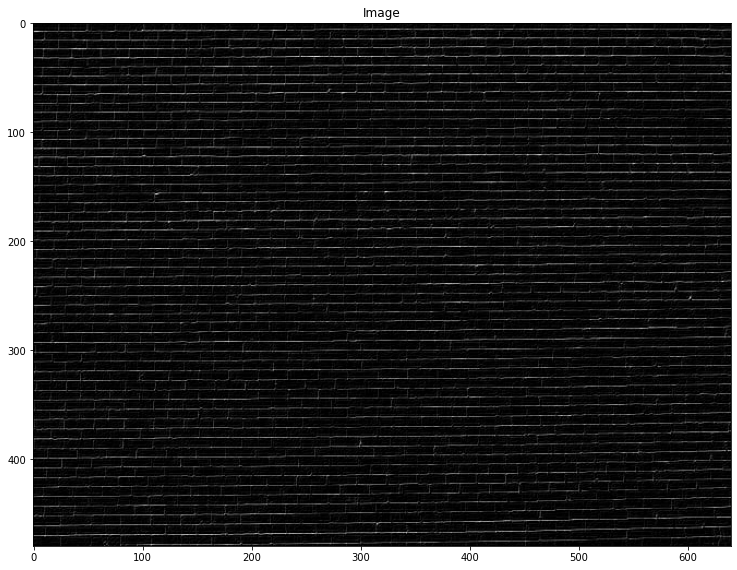

In [ ]:
edge_det_image = morph_edge_detection(low_con)
show_image(edge_det_image)

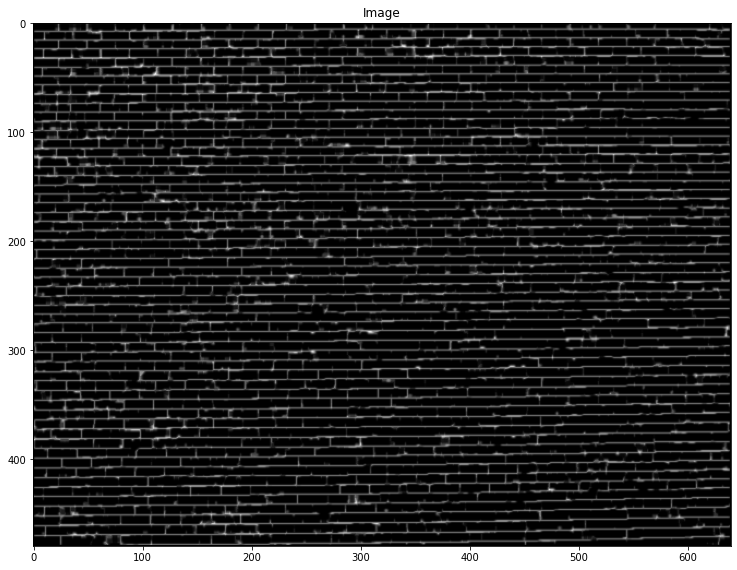

In [ ]:
thresholded_image = thresholding(edge_det_image, 15)
blurred_image = gaussian_blur(thresholded_image)
erosed_image = erosion(blurred_image, 3)
show_image(erosed_image)

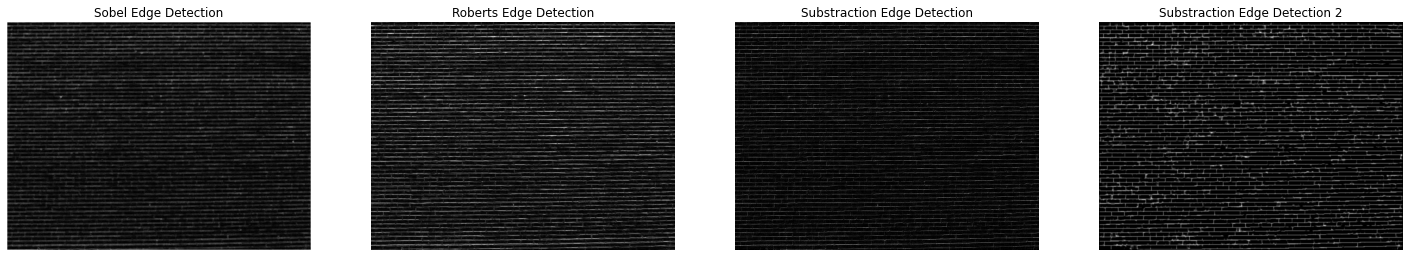

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 20))
ax[0].imshow(sobel_low_con, cmap='gray')
ax[0].set_title('Sobel Edge Detection')
ax[0].axis('off')
ax[1].imshow(roberts_low_con, cmap='gray')
ax[1].set_title('Roberts Edge Detection')
ax[1].axis('off')
ax[2].imshow(edge_det_image, cmap='gray')
ax[2].set_title('subtraction Edge Detection')
ax[2].axis('off')
ax[3].imshow(erosed_image, cmap='gray')
ax[3].set_title('subtraction Edge Detection 2')
ax[3].axis('off')
plt.show()

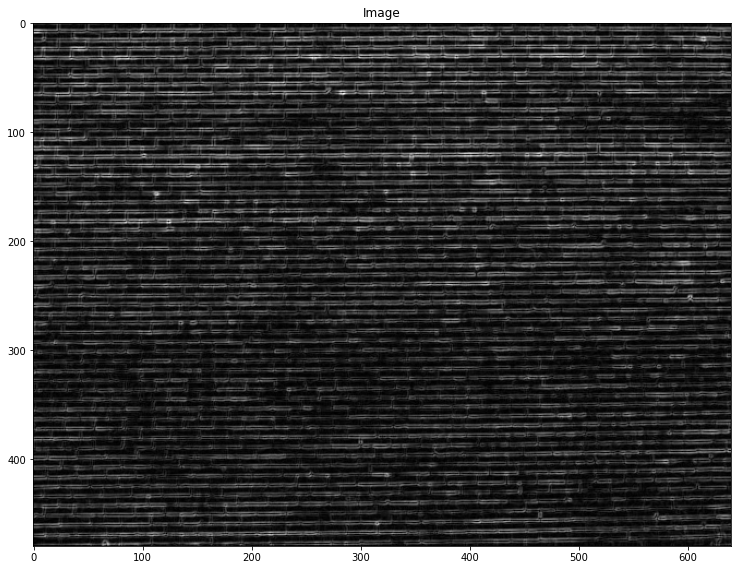

In [ ]:
image = cv2.GaussianBlur(low_con, (3, 3), 0)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
    
grad_1 = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

show_image(grad_1)

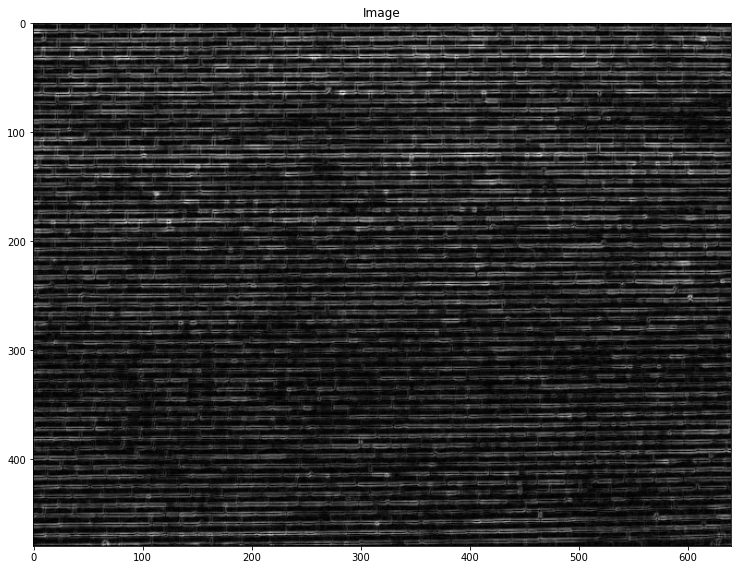

In [ ]:
gray = cv2.cvtColor(low_con, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(gray, (3, 3), 0)

grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
    
grad_2 = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

show_image(grad_2)

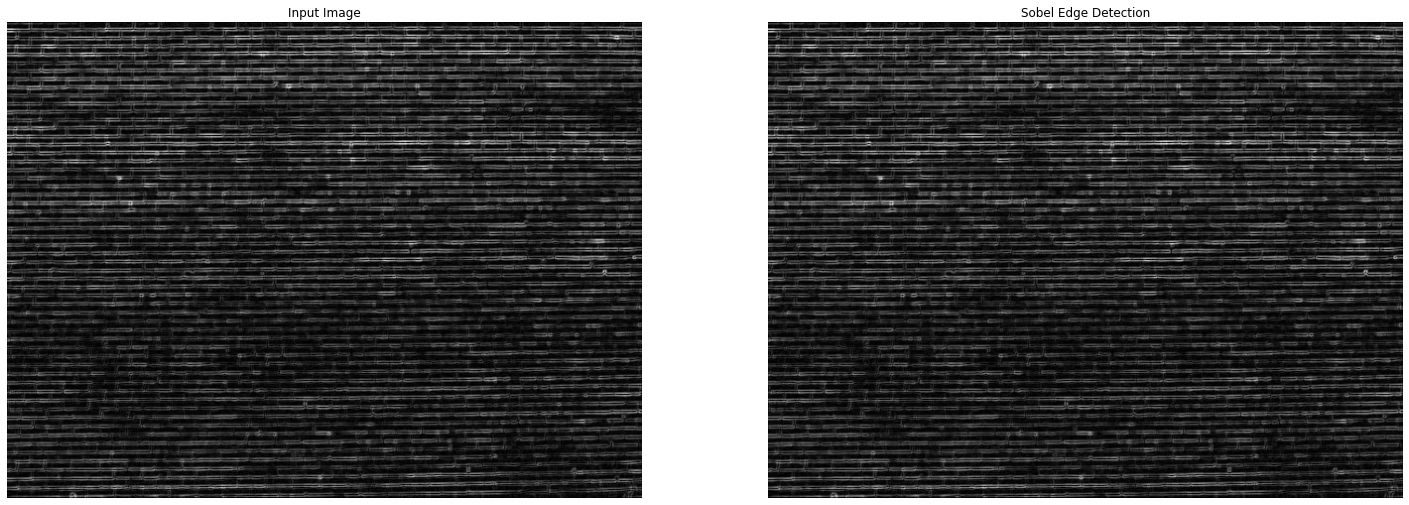

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 20))
ax[0].imshow(grad_1, cmap='gray')
ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(grad_2, cmap='gray')
ax[1].set_title('Sobel Edge Detection')
ax[1].axis('off')
plt.show()